In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

In [2]:
data = loadmat('ex8data1.mat')

In [17]:
X = data['X']
Xval = data['Xval']

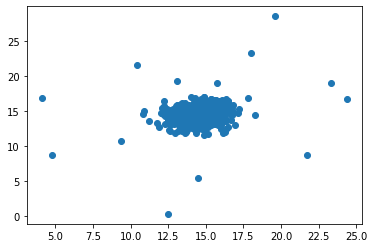

In [65]:
plt.scatter(X,Xval)

(array([[  1.,   0.,   0.,   9., 170., 122.,   2.,   1.,   1.,   1.],
        [  1.,   0.,   1.,   2.,  53., 219.,  30.,   0.,   0.,   1.]]),
 array([ 4.12623222,  6.14864973,  8.17106723, 10.19348473, 12.21590223,
        14.23831974, 16.26073724, 18.28315474, 20.30557224, 22.32798975,
        24.35040725]),
 <a list of 2 BarContainer objects>)

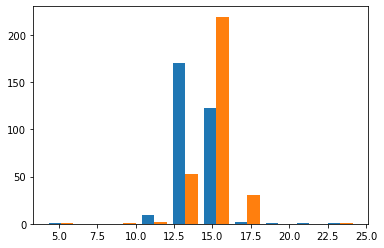

In [30]:
plt.hist(X)

(array([[  1.,   0.,   2.,   0., 191., 110.,   2.,   0.,   0.,   1.],
        [  0.,   1.,   0.,   1.,  84., 218.,   1.,   1.,   1.,   0.]]),
 array([ 0.30793846,  3.1313232 ,  5.95470793,  8.77809267, 11.60147741,
        14.42486214, 17.24824688, 20.07163161, 22.89501635, 25.71840109,
        28.54178582]),
 <a list of 2 BarContainer objects>)

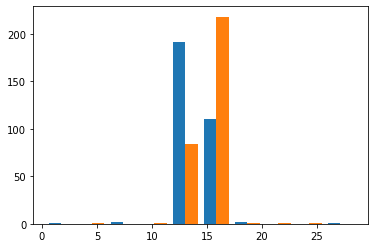

In [29]:
plt.hist(Xval)

In [43]:
def estimate_gaussian(X):  
    mu = np.mean(X)
    sigma = np.std(X)
    return mu, sigma
 
print(estimate_gaussian(X)[1])
print(estimate_gaussian(Xval))

1.4025723408635227
(14.528522397236973, 1.5268441479297115)


In [41]:
yval = data['yval']

In [47]:
from scipy import stats
Xprob = stats.norm.pdf(X, loc=estimate_gaussian(X)[0], scale=estimate_gaussian(X)[1])
Xprob

array([[1.59556663e-01, 2.81941107e-01],
       [2.03658787e-01, 2.42548146e-01],
       [2.75267060e-01, 1.85331552e-01],
       [2.75232902e-01, 1.46065567e-01],
       [2.23021560e-01, 2.66093968e-01],
       [2.56930735e-01, 2.03415256e-01],
       [1.32597118e-01, 2.76588419e-01],
       [2.06620768e-01, 1.80612803e-01],
       [1.47435938e-01, 1.42620904e-01],
       [1.14895416e-01, 2.76002926e-01],
       [2.61859626e-01, 1.48756551e-01],
       [2.67362771e-01, 2.84433654e-01],
       [2.01441403e-01, 2.19805611e-01],
       [2.01872840e-01, 2.12387656e-01],
       [2.61437246e-01, 1.88245581e-01],
       [2.73809200e-01, 2.83862416e-01],
       [2.60100699e-01, 2.81648332e-01],
       [2.83771072e-01, 2.65878748e-01],
       [2.84371979e-01, 1.88475675e-01],
       [5.95251958e-02, 1.62041756e-01],
       [2.19942233e-01, 2.22461849e-01],
       [2.61988606e-01, 2.80545132e-01],
       [2.72256638e-01, 1.06780230e-01],
       [2.78037298e-01, 2.47543993e-01],
       [2.437536

In [51]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
Xval_prob = stats.norm.pdf(Xval, loc=estimate_gaussian(Xval)[0], scale=estimate_gaussian(Xval)[1])

In [62]:
pval[:,0] = Xval_prob[:,0]
pval[:,1] = Xval_prob[:,1]
print(Xval[:,0])
print(pval[:,0])

[15.79025979 13.63961877 14.86589943 13.58467605 13.46404167 12.94888838
 15.31084155 13.89795241 11.92096525 14.85934119 13.63501268 15.75981741
 15.221965   12.10564111 14.80848889 15.36135887 12.72914442 15.38533789
 13.81810534 15.3788488  14.11232153 12.82415241 14.58354683 14.2948367
 13.5112881  13.71433284 12.85788467 14.56998008 15.59049569 13.0999943
 14.61461465 13.92751557 13.28968651 14.3283751  12.99369072 13.21733162
 13.72874052 12.59667946 14.03082134 14.06074927 15.26965979 15.88197423
 15.07180425 13.98475169 14.16180226 14.68681165 14.11912326 14.31950715
 13.30913392 13.55172581 15.17132208 14.28066671 13.33650871 14.37685832
 14.32568928 14.62490061 14.16924635 12.97208251 12.37375969 15.15445808
 14.09323314 12.59487824 13.61531825 12.6703164  14.70384383 15.2784321
 13.27130435 14.13665397 15.29429909 14.66965517 14.0310698  13.77413651
 14.55210322 13.88568273 14.43425109 13.38583496 13.82625926 15.20555071
 12.37135055 14.54985291 13.10468926 14.2203734  13.80

In [74]:
from sklearn.metrics import f1_score

In [66]:
def select_threshold(pval, yval): 
    pspace = np.array(np.linspace(pval.min(),pval.max(),10000))
    best_eps = pspace[0]
    eps = pspace[0]
    pred = np.zeros((len(yval),1))
    for k in range(len(yval)):
        if pval[k,0] > eps or pval[k,1] > eps:
            pred[k] = 1
    best_f1 = f1_score(yval, pred)
    for i in range(len(pspace)):
        eps = pspace[i]
        pred = np.zeros((len(yval),1))
        for k in range(len(yval)):
            if pval[k,0] < eps or pval[k,1] < eps:
                pred[k] = 1
        f1 = f1_score(yval, pred)
        if f1 > best_f1:
            best_eps = eps
            best_f1 = f1
    return best_eps, best_f1

In [69]:
best_eps, best_f1 = select_threshold(pval, yval)

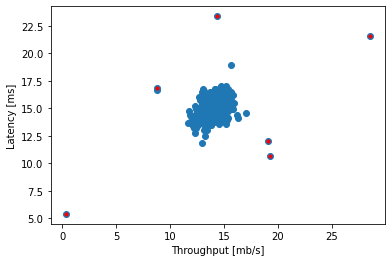

In [70]:
anomal = np.where(pval < best_eps)
anomal = list(dict.fromkeys(anomal[0]))


plt.figure()
plt.scatter(Xval[:, 0], Xval[:, 1])
plt.scatter(Xval[anomal[0]:anomal[len(anomal)-1], 0], Xval[anomal[0]:anomal[len(anomal)-1], 1], s=10, color='r')
plt.xlabel('Throughput [mb/s]')
plt.ylabel('Latency [ms]')
plt.show()